In [14]:
import pandas as pd

df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/demo2_data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002673FED3B88>,
      dtype=object)

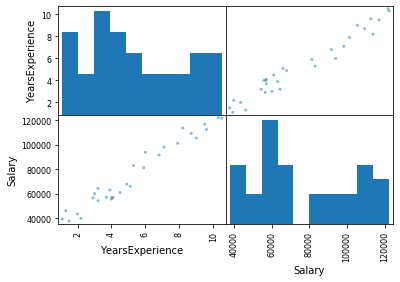

In [15]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df)

In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
X = df[ ['YearsExperience'] ]

y = df['Salary']

display(X)
display(y)

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(X_test)

YearsExperience
27              9.6
11              4.0
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0

YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

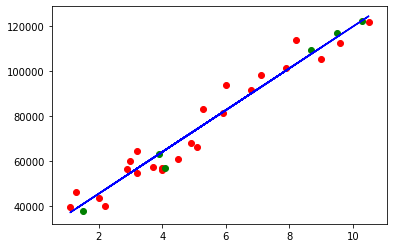

In [20]:
import matplotlib.pyplot as plt

plt.plot(X_train, model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [21]:
model.predict(pd.DataFrame([24]))

array([250281.90219213])

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.988169515729126

In [23]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)

ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, ridge_model.predict(X_test))

0.9878913038174129

In [25]:
# only have the result of training, no training data
# store it to the memory
import joblib
joblib.dump(model, 'exp_salary.joblib')

['exp_salary.joblib']